# Inspect Pascal VOC (2007&2012) Detection torchvision Dataset

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.utils.data.dataloader as dataloader
import torchvision
from torchvision import transforms
from torchvision.transforms import v2
from torchvision.utils import draw_bounding_boxes
from torch.utils.data import ConcatDataset
from torchvision import tv_tensors
from torchvision.datasets import wrap_dataset_for_transforms_v2
from torchvision.tv_tensors._dataset_wrapper import VOC_DETECTION_CATEGORIES, VOC_DETECTION_CATEGORY_TO_IDX
from torchvision.ops import box_convert
from torchvision import tv_tensors
# palette is a list of color tuples, which is used for visualization.
palette =  [(106, 0, 228), (119, 11, 32), (165, 42, 42), (0, 0, 192),
            (197, 226, 255), (0, 60, 100), (0, 0, 142), (255, 77, 255),
            (153, 69, 1), (120, 166, 157), (0, 182, 199),
            (0, 226, 252), (182, 182, 255), (0, 0, 230), (220, 20, 60),
            (163, 255, 0), (0, 82, 0), (3, 95, 161), (0, 80, 100),
            (183, 130, 88)]

## Check sample data

In [2]:
dataset_2007_train = torchvision.datasets.VOCDetection(root='../data/voc', year='2007', image_set='train', download=False,
                                                       transform=v2.Compose([v2.ToImage(), v2.ToDtype(torch.uint8, scale=True)]))
dataset_2007_val = torchvision.datasets.VOCDetection(root='../data/voc', year='2007', image_set='val', download=False,
                                                     transform=v2.Compose([v2.ToImage(), v2.ToDtype(torch.uint8, scale=True)]))
dataset_2007_trainval = torchvision.datasets.VOCDetection(root='../data/voc', year='2007', image_set='trainval', download=False,
                                                     transform=v2.Compose([v2.ToImage(), v2.ToDtype(torch.uint8, scale=True)]))
dataset_2007_test = torchvision.datasets.VOCDetection(root='../data/voc', year='2007', image_set='test', download=False,
                                                      transform=v2.Compose([v2.ToImage(), v2.ToDtype(torch.uint8, scale=True)]))
dataset_2012_train = torchvision.datasets.VOCDetection(root='../data/voc', year='2012', image_set='train', download=False,
                                                       transform=v2.Compose([v2.ToImage(), v2.ToDtype(torch.uint8, scale=True)]))
dataset_2012_val = torchvision.datasets.VOCDetection(root='../data/voc', year='2012', image_set='val', download=False,
                                                     transform=v2.Compose([v2.ToImage(), v2.ToDtype(torch.uint8, scale=True)]))
dataset_2012_trainval = torchvision.datasets.VOCDetection(root='../data/voc', year='2012', image_set='trainval', download=False,
                                                       transform=v2.Compose([v2.ToImage(), v2.ToDtype(torch.uint8, scale=True)]))

Len of dataset_2007_train: 2501
Len of dataset_2007_val: 2510
Len of dataset_2007_trainval: 5011
Len of dataset_2007_test: 4952
Len of dataset_2012_train: 5717
Len of dataset_2012_val: 5823
Len of dataset_2012_trainval: 11540
Sample:
Image: Image([[[ 59,  17,   0,  ..., 208, 218, 182],
        [ 84,  16,   1,  ..., 255, 253, 231],
        [113,  16,   0,  ..., 233, 229, 223],
        ...,
        [ 90, 106, 136,  ..., 199, 199, 202],
        [113, 120, 134,  ..., 196, 195, 198],
        [114, 123, 112,  ..., 199, 201, 203]],

       [[112,  57,   6,  ..., 197, 206, 173],
        [132,  53,  13,  ..., 246, 243, 223],
        [154,  48,   6,  ..., 220, 220, 216],
        ...,
        [ 76,  90, 117,  ..., 179, 182, 185],
        [ 99, 104, 115,  ..., 176, 178, 183],
        [100, 107,  93,  ..., 182, 184, 188]],

       [[252, 179,  95,  ..., 179, 190, 156],
        [255, 168,  97,  ..., 232, 231, 210],
        [255, 151,  82,  ..., 214, 215, 210],
        ...,
        [ 63,  77, 103,  .

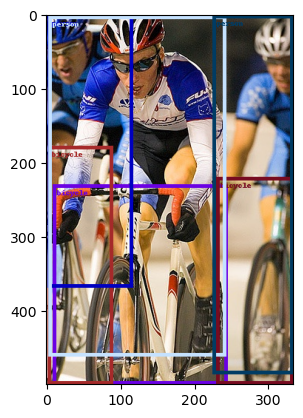

In [3]:
print(f"Len of dataset_2007_train: {len(dataset_2007_train)}")
print(f"Len of dataset_2007_val: {len(dataset_2007_val)}")
print(f"Len of dataset_2007_trainval: {len(dataset_2007_trainval)}")
print(f"Len of dataset_2007_test: {len(dataset_2007_test)}")
print(f"Len of dataset_2012_train: {len(dataset_2012_train)}")
print(f"Len of dataset_2012_val: {len(dataset_2012_val)}")
print(f"Len of dataset_2012_trainval: {len(dataset_2012_trainval)}")

print("Sample:")
x, y = dataset_2007_train[2]
print(f"Image: {x} ({type(x)=}), hw={x.shape}")  # Before transforms, it's a PIL Image with non-fixed size
print(f"Label: {y} ({type(y)=})")
print(f"Bounding boxes:")
boxes = []
labels = []
for box in y['annotation']['object']:
    boxes.append([int(box['bndbox']['xmin']), int(box['bndbox']['ymin']), int(box['bndbox']['xmax']), int(box['bndbox']['ymax'])])
    labels.append(box['name'])
    print(f"  {box['name']}: {box['bndbox']}")
img = draw_bounding_boxes(x, boxes=torch.tensor(boxes), labels=labels, colors=[palette[i%len(palette)] for i in range(len(boxes))], width=5)
plt.imshow(img.permute(1, 2, 0))

In [4]:
dataset_train = ConcatDataset([dataset_2007_train, dataset_2012_train, dataset_2007_val, dataset_2012_val])
dataset_test = dataset_2007_test

print(f"Len of dataset_train: {len(dataset_train)}")
print(f"Len of dataset_test: {len(dataset_test)}")

Len of dataset_train: 16551
Len of dataset_test: 4952


## Test transform & target_transform

In [5]:
dataset_2007_train = torchvision.datasets.VOCDetection(root='../data/voc', year='2007', image_set='train', download=False,
                                                       transform=v2.Compose([v2.ToImage(), v2.ToDtype(torch.uint8, scale=True)]),
                                                       target_transform=lambda y: [[bbox['name'], torch.tensor([int(box['bndbox']['xmin']),
                                                                                                                int(box['bndbox']['ymin']),
                                                                                                                int(box['bndbox']['xmax']),
                                                                                                                int(box['bndbox']['ymax'])])]
                                                                                   for bbox in y['annotation']['object']])
x, y = dataset_2007_train[2]
print(f"Image: {x} ({type(x)=}), hw={x.shape}")
print(f"Label: {y} ({type(y)=})")

Image: Image([[[ 59,  17,   0,  ..., 208, 218, 182],
        [ 84,  16,   1,  ..., 255, 253, 231],
        [113,  16,   0,  ..., 233, 229, 223],
        ...,
        [ 90, 106, 136,  ..., 199, 199, 202],
        [113, 120, 134,  ..., 196, 195, 198],
        [114, 123, 112,  ..., 199, 201, 203]],

       [[112,  57,   6,  ..., 197, 206, 173],
        [132,  53,  13,  ..., 246, 243, 223],
        [154,  48,   6,  ..., 220, 220, 216],
        ...,
        [ 76,  90, 117,  ..., 179, 182, 185],
        [ 99, 104, 115,  ..., 176, 178, 183],
        [100, 107,  93,  ..., 182, 184, 188]],

       [[252, 179,  95,  ..., 179, 190, 156],
        [255, 168,  97,  ..., 232, 231, 210],
        [255, 151,  82,  ..., 214, 215, 210],
        ...,
        [ 63,  77, 103,  ..., 152, 154, 157],
        [ 88,  91, 101,  ..., 149, 148, 152],
        [ 89,  94,  79,  ..., 154, 154, 157]]], dtype=torch.uint8, ) (type(x)=<class 'torchvision.tv_tensors._image.Image'>), hw=torch.Size([3, 500, 334])
Label: [['bic

## Wrap by v2

In [6]:
dataset_2007_train = torchvision.datasets.VOCDetection(root='../data/voc', year='2007', image_set='train', download=False)
print("Without v2 wrap:")
x, y = dataset_2007_train[2]
print(x, y)
print(y.keys())

dataset_2007_train_v2 = wrap_dataset_for_transforms_v2(dataset_2007_train)
print("\nWith v2 wrap & target_keys=None:")
x, y = dataset_2007_train_v2[2]
print(x, y)
print(y.keys())
print(f"labels2categories: {[VOC_DETECTION_CATEGORIES[idx] for idx in y['labels']]}")

dataset_2007_train_v2 = wrap_dataset_for_transforms_v2(dataset_2007_train, target_keys='all')
print("\nWith v2 wrap & target_keys='all':")
x, y = dataset_2007_train_v2[2]
print(x, y)
print(y.keys())

Without v2 wrap:
<PIL.Image.Image image mode=RGB size=334x500 at 0x7FA6EC71B580> {'annotation': {'folder': 'VOC2007', 'filename': '000023.jpg', 'source': {'database': 'The VOC2007 Database', 'annotation': 'PASCAL VOC2007', 'image': 'flickr', 'flickrid': '220208496'}, 'owner': {'flickrid': 'thevelodrome.com', 'name': '?'}, 'size': {'width': '334', 'height': '500', 'depth': '3'}, 'segmented': '0', 'object': [{'name': 'bicycle', 'pose': 'Unspecified', 'truncated': '1', 'difficult': '0', 'bndbox': {'xmin': '9', 'ymin': '230', 'xmax': '245', 'ymax': '500'}}, {'name': 'bicycle', 'pose': 'Frontal', 'truncated': '1', 'difficult': '0', 'bndbox': {'xmin': '230', 'ymin': '220', 'xmax': '334', 'ymax': '500'}}, {'name': 'bicycle', 'pose': 'Unspecified', 'truncated': '1', 'difficult': '1', 'bndbox': {'xmin': '2', 'ymin': '178', 'xmax': '90', 'ymax': '500'}}, {'name': 'person', 'pose': 'Unspecified', 'truncated': '1', 'difficult': '0', 'bndbox': {'xmin': '2', 'ymin': '1', 'xmax': '117', 'ymax': '369'

## All together

x=Image([[[0.4824, 0.4824, 0.4824,  ..., 0.5333, 0.5255, 0.5216],
        [0.4824, 0.4824, 0.4824,  ..., 0.5490, 0.5294, 0.4980],
        [0.4824, 0.4824, 0.4824,  ..., 0.5412, 0.5373, 0.5137],
        ...,
        [0.4824, 0.4824, 0.4824,  ..., 0.2588, 0.3216, 0.4039],
        [0.4824, 0.4824, 0.4824,  ..., 0.2824, 0.2549, 0.3137],
        [0.4824, 0.4824, 0.4824,  ..., 0.1647, 0.2275, 0.3059]],

       [[0.4588, 0.4588, 0.4588,  ..., 0.6157, 0.6078, 0.6078],
        [0.4588, 0.4588, 0.4588,  ..., 0.6353, 0.6118, 0.6039],
        [0.4588, 0.4588, 0.4588,  ..., 0.6235, 0.6235, 0.6235],
        ...,
        [0.4588, 0.4588, 0.4588,  ..., 0.3412, 0.3843, 0.4549],
        [0.4588, 0.4588, 0.4588,  ..., 0.3686, 0.3294, 0.3725],
        [0.4588, 0.4588, 0.4588,  ..., 0.2549, 0.3059, 0.3804]],

       [[0.4078, 0.4078, 0.4078,  ..., 0.5137, 0.5098, 0.5098],
        [0.4078, 0.4078, 0.4078,  ..., 0.5373, 0.5176, 0.4980],
        [0.4078, 0.4078, 0.4078,  ..., 0.5333, 0.5294, 0.5137],
        

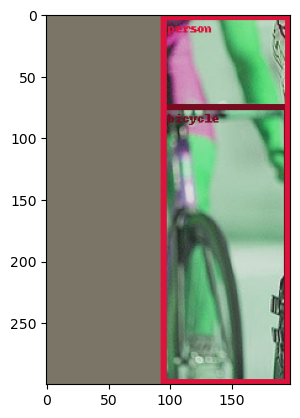

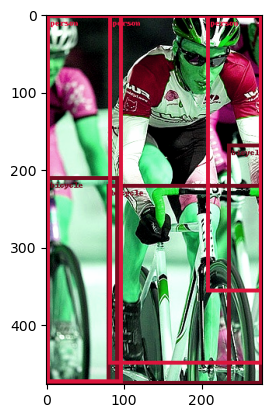

In [7]:
transforms = v2.Compose(
    [
        v2.ToImage(),
        v2.RandomPhotometricDistort(p=1),
        v2.RandomZoomOut(fill={tv_tensors.Image: (123, 117, 104), "others": 0}),
        v2.RandomIoUCrop(),
        v2.RandomHorizontalFlip(p=1),
        v2.SanitizeBoundingBoxes(),
        v2.ToDtype(torch.float32, scale=True),
    ]
)
dataset_2007_train = torchvision.datasets.VOCDetection(root='../data/voc', year='2007', image_set='train', download=False,
                                                       transforms=transforms)
dataset_2007_train_v2 = wrap_dataset_for_transforms_v2(dataset_2007_train, target_keys=['boxes', 'labels'])

x, y = dataset_2007_train_v2[2]
print(f"{x=}\n{y=}")
labels = [VOC_DETECTION_CATEGORIES[idx] for idx in y['labels']]
img = draw_bounding_boxes(v2.functional.to_dtype(x, torch.uint8, scale=True), labels=labels, boxes=y['boxes'], colors=[palette[idx-1] for idx in y['labels']], width=5)
plt.imshow(img.permute(1, 2, 0).numpy())
plt.show()

x, y = dataset_2007_train_v2[2]
labels = [VOC_DETECTION_CATEGORIES[idx] for idx in y['labels']]
img = draw_bounding_boxes(v2.functional.to_dtype(x, torch.uint8, scale=True), labels=labels, boxes=y['boxes'], colors=[palette[idx-1] for idx in y['labels']], width=5)
plt.imshow(img.permute(1, 2, 0).numpy())
plt.show()

## Add custom transform

x.shape=torch.Size([3, 448, 448])
y.shape=torch.Size([7, 7, 6])
y={'boxes': tensor([[-1.5259e-05,  1.2700e+02,  2.4400e+02,  2.9900e+02],
        [ 0.0000e+00,  0.0000e+00,  3.2200e+02,  4.4800e+02]]), 'labels': tensor([7, 8])}
y_supp={'boxes': tensor([[  0,   0, 322, 448],
        [  0, 127, 244, 299]]), 'labels': tensor([8, 7])}


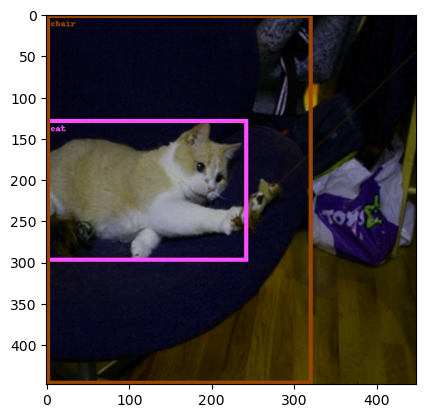

x.shape=torch.Size([3, 448, 448])
y.shape=torch.Size([7, 7, 6])
y={'boxes': tensor([[1.5259e-05, 1.6000e+01, 3.8000e+02, 4.4800e+02],
        [5.4000e+01, 1.8500e+02, 3.1000e+02, 3.7500e+02]]), 'labels': tensor([8, 7])}
y_supp={'boxes': tensor([[  0,  16, 380, 448],
        [ 54, 185, 310, 375]]), 'labels': tensor([8, 7])}


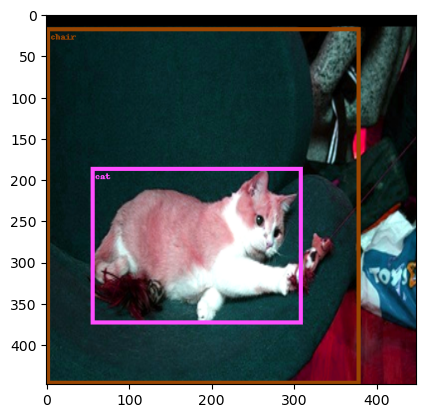

In [39]:
img_h = 448
img_w = 448
n_grid_w = 7
n_grid_h = 7


class Voc2Yolov1(nn.Module):
    """
    y_yolov1 (Tensor): size(N, n_grid_h, n_grid_w, (1 + 1 + 4))
        targets[i, j, k, 0] is the is_obj for the j,k-th grid cell, 1.0 if there is an object, 0.0 otherwise
        targets[i, j, k, 1] is the class index for the j,k-th grid cell, 0.0~float(n_class-1)
        targets[i, j, k, 2:6] is the bbox coordinates for the j,k-th grid cell, 0.0~1.0
            targets[i, j, k, 2] is the x coordinate of the bbox center normalized by the "grid cell" width
            targets[i, j, k, 3] is the y coordinate of the bbox center normalized by the "grid cell" height
            targets[i, j, k, 4] is the sqrt(w) of the bbox normalized by the "img" width
            targets[i, j, k, 5] is the sqrt(h) of the bbox normalized by the "img" height
    y_voc['boxes'] (tv_tensors.BoundingBoxes): size(n_bbox, 4), format='XYXY'
        y_voc['boxes'] is not normalized
    """
    def forward(self, x, y_voc):
        boxes_yolov1 = y_voc['boxes'].clone()
        # Transform the bounding boxes from xyxy to cxcywh normalized by the image size
        boxes_yolov1 = box_convert(boxes_yolov1, in_fmt='xyxy', out_fmt='cxcywh')
        boxes_yolov1[:, [0, 2]] /= img_w
        boxes_yolov1[:, [1, 3]] /= img_h
        # Randomly shuffle the bounding boxes and labels, since only one object can be assigned to a grid cell
        idx = torch.randperm(len(boxes_yolov1))
        y_voc['boxes'] = y_voc['boxes'][idx]
        boxes_yolov1 = boxes_yolov1[idx]
        y_voc['labels'] = y_voc['labels'][idx] - 1  # remove background class
        y_yolov1 = torch.zeros((n_grid_h, n_grid_w, 1 + 1 + 4), dtype=torch.float32)
        cx_yolov1, cy_yolov1, w_yolov1, h_yolov1 = torch.unbind(boxes_yolov1, dim=1)
        grid_x = torch.clamp_max(torch.floor(cx_yolov1 * n_grid_w), (n_grid_w - 1)).to(torch.int64)
        grid_y = torch.clamp_max(torch.floor(cy_yolov1 * n_grid_h), (n_grid_h - 1)).to(torch.int64)
        y_yolov1[grid_y, grid_x, 0] = 1.0  # set the is_obj to 1.0
        y_yolov1[grid_y, grid_x, 1] = y_voc['labels'].to(torch.float32)  # set the class index to label
        # Set the bbox coordinates, x,y are normalized by the grid size
        y_yolov1[grid_y, grid_x, 2] = cx_yolov1 * n_grid_w - grid_x
        y_yolov1[grid_y, grid_x, 3] = cy_yolov1 * n_grid_h - grid_y
        y_yolov1[grid_y, grid_x, 4] = torch.sqrt(w_yolov1)
        y_yolov1[grid_y, grid_x, 5] = torch.sqrt(h_yolov1)
        return x, y_yolov1, y_voc

    def inv_targets_transform(self, y_yolov1):
        y_voc = {}
        y_voc['boxes'] = torch.zeros((0, 4), dtype=torch.float32)
        y_voc['labels'] = torch.zeros((0,), dtype=torch.int64)
        for grid_y in range(n_grid_h):
            for grid_x in range(n_grid_w):
                if y_yolov1[grid_y, grid_x, 0] > 0.0:
                    box = torch.zeros((4,), dtype=torch.float32)
                    box[0] = (y_yolov1[grid_y, grid_x, 2] + grid_x) / n_grid_w
                    box[1] = (y_yolov1[grid_y, grid_x, 3] + grid_y) / n_grid_h
                    box[2] = y_yolov1[grid_y, grid_x, 4] ** 2
                    box[3] = y_yolov1[grid_y, grid_x, 5] ** 2
                    y_voc['boxes'] = torch.cat((y_voc['boxes'], box.unsqueeze(0)), dim=0)
                    label = (y_yolov1[grid_y, grid_x, 1]).to(torch.int64).unsqueeze(0)
                    y_voc['labels'] = torch.cat((y_voc['labels'], label), dim=0)
        y_voc['boxes'][:, [0, 2]] *= img_w
        y_voc['boxes'][:, [1, 3]] *= img_h
        y_voc['boxes'] = box_convert(y_voc['boxes'], in_fmt='cxcywh', out_fmt='xyxy')
        return y_voc


scale_min = 0.44
scale_max = 1.44
aspect_min = 0.5
aspect_max = 2.0
brightness = 0.5
contrast = 0.0
saturation = 0.5
hue = 0.1
imgs_mean = [0.0, 0.0, 0.0]
imgs_std = [1.0, 1.0, 1.0]

transforms = v2.Compose([
    v2.ToImage(),
    v2.RandomZoomOut(fill={tv_tensors.Image: (0, 0, 0), "others": 0}, side_range=(1.0, scale_max)),
    v2.RandomIoUCrop(min_scale=scale_min, max_scale=1.0, min_aspect_ratio=0.5, max_aspect_ratio=2.0),
    v2.ColorJitter(brightness=brightness, contrast=contrast, saturation=saturation, hue=hue),
    v2.RandomHorizontalFlip(p=0.5),
    v2.Resize(size=(img_h, img_w), antialias=True),
    v2.SanitizeBoundingBoxes(),
    v2.ToDtype(torch.float32, scale=True),
    Voc2Yolov1(),
])

dataset_2007_train = torchvision.datasets.VOCDetection(root='../data/voc', year='2007', image_set='train', download=False,
                                                       transforms=transforms)
dataset_2007_train_v2 = wrap_dataset_for_transforms_v2(dataset_2007_train, target_keys=['boxes', 'labels'])

x, y, y_supp = dataset_2007_train_v2[10]
print(f"{x.shape=}\n{y.shape=}")
y = Voc2Yolov1().inv_targets_transform(y)
print(f"{y=}")
print(f"{y_supp=}")
labels = [VOC_DETECTION_CATEGORIES[idx+1] for idx in y['labels']]
img = draw_bounding_boxes(v2.functional.to_dtype(x, torch.uint8, scale=True),
                          labels=labels, boxes=y['boxes'],
                          colors=[palette[idx] for idx in y['labels']], width=5)
plt.imshow(img.permute(1, 2, 0).numpy())
plt.show()

x, y, y_supp = dataset_2007_train_v2[10]
print(f"{x.shape=}\n{y.shape=}")
y = Voc2Yolov1().inv_targets_transform(y)
print(f"{y=}")
print(f"{y_supp=}")
labels = [VOC_DETECTION_CATEGORIES[idx+1] for idx in y['labels']]
img = draw_bounding_boxes(v2.functional.to_dtype(x, torch.uint8, scale=True),
                          labels=labels, boxes=y['boxes'],
                          colors=[palette[idx] for idx in y['labels']], width=5)
plt.imshow(img.permute(1, 2, 0).numpy())
plt.show()

# Dataloader

In [41]:
dataset_2007_train = torchvision.datasets.VOCDetection(root='../data/voc', year='2007', image_set='train', download=False,
                                                       transforms=v2.Compose([v2.ToImage(),
                                                                              v2.RandomHorizontalFlip(p=1),
                                                                              v2.Resize(size=min(img_h, img_w)-1, max_size=min(img_h, img_w)),  # HACK: max_size has to be larger than size
                                                                              v2.CenterCrop((img_h, img_w)),
                                                                              v2.SanitizeBoundingBoxes(),
                                                                              v2.ToDtype(torch.float32, scale=True),
                                                                              Voc2Yolov1()]))
dataset_2007_train_v2 = wrap_dataset_for_transforms_v2(dataset_2007_train, target_keys=['boxes', 'labels'])
print(dataset_2007_train_v2[10][0].shape)
print(dataset_2007_train_v2[11][0].shape)
print(dataset_2007_train_v2[12][0].shape)
def collate_fn(batch):
    xs, ys, y_supps = [], [], []
    for x, y, y_supp in batch:
        xs.append(x)
        ys.append(y)
        y_supps.append(y_supp)
    return torch.stack(xs), torch.stack(ys), y_supps
dataloader_2007_train = dataloader.DataLoader(dataset_2007_train_v2, batch_size=4, shuffle=True, num_workers=0,
                                              collate_fn=collate_fn)
X, Y, y_supp = next(iter(dataloader_2007_train))
print(f"{X.shape=}\n{Y.shape=}")
print(f"{y_supp=}")

torch.Size([3, 448, 448])
torch.Size([3, 448, 448])
torch.Size([3, 448, 448])
X.shape=torch.Size([4, 3, 448, 448])
Y.shape=torch.Size([4, 7, 7, 6])
y_supp=[{'boxes': tensor([[241, 198, 294, 252],
        [263, 307, 317, 324],
        [302, 299, 349, 319],
        [416, 302, 446, 322]]), 'labels': tensor([0, 3, 3, 3])}, {'boxes': tensor([[ 18, 119, 441, 383]]), 'labels': tensor([5])}, {'boxes': tensor([[ 49, 140, 388, 392],
        [ 60, 237,  72, 276],
        [430, 248, 447, 341],
        [408, 249, 426, 291],
        [ 41, 239,  62, 279]]), 'labels': tensor([14, 14, 14, 14, 14])}, {'boxes': tensor([[ 95, 214, 316, 444],
        [135,  65, 250, 291]]), 'labels': tensor([12, 14])}]


## ConcatDataset + wrap_dataset_for_transforms_v2

In [42]:
transforms = v2.Compose([v2.ToImage(),
                         v2.RandomHorizontalFlip(p=1),
                         v2.Resize(size=min(img_h, img_w)-1, max_size=min(img_h, img_w), antialias=True),  # HACK: max_size has to be larger than size
                         v2.CenterCrop((img_h, img_w)),
                         v2.SanitizeBoundingBoxes(),
                         v2.ToDtype(torch.float32, scale=True),
                         Voc2Yolov1()])
dataset_2007_train = torchvision.datasets.VOCDetection(root='../data/voc', year='2007', image_set='train', download=False,
                                                       transforms=transforms)
dataset_2007_train_v2 = wrap_dataset_for_transforms_v2(dataset_2007_train, target_keys=['boxes', 'labels'])
dataset_2007_val = torchvision.datasets.VOCDetection(root='../data/voc', year='2007', image_set='val', download=False,
                                                     transforms=transforms)
dataset_2007_val_v2 = wrap_dataset_for_transforms_v2(dataset_2007_val, target_keys=['boxes', 'labels'])
dataset_2007_trainval_cat = ConcatDataset([dataset_2007_train_v2, dataset_2007_val_v2])
datasetloader_2007_trainval_cat = dataloader.DataLoader(dataset_2007_trainval_cat, batch_size=4, shuffle=True, num_workers=0,
                                                        collate_fn=collate_fn)
print(next(iter(datasetloader_2007_trainval_cat))[0].shape)

torch.Size([4, 3, 448, 448])
